subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


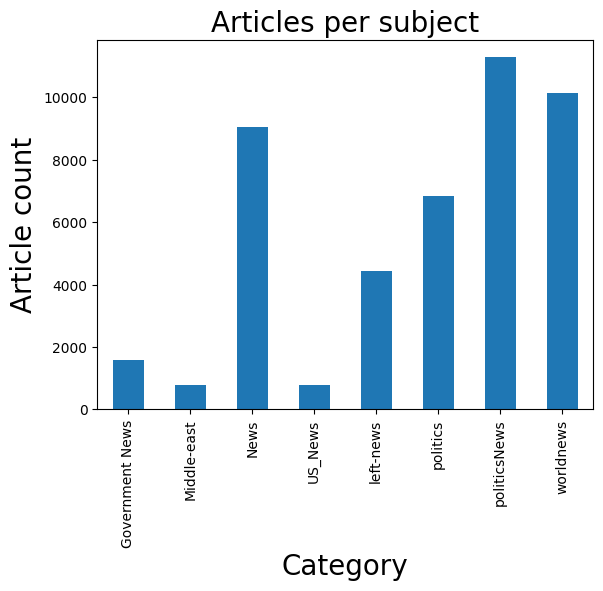

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


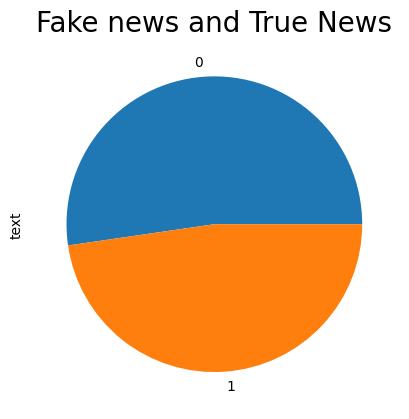

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5840
           1       0.98      0.98      0.98      5380

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

[[5756   84]
 [  82 5298]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5840
           1       1.00      1.00      1.00      5380

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5840
           1       1.00      1.00      1.00      5380

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00    

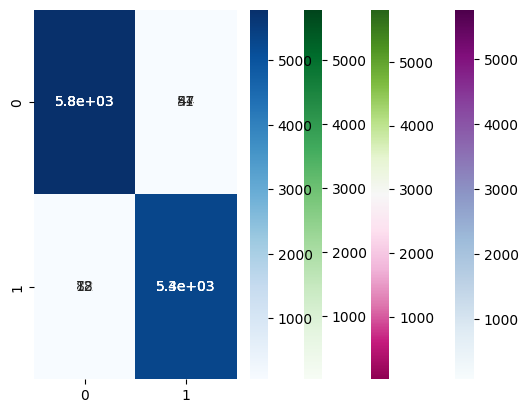

In [ ]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset
data_true=pd.read_csv("/content/drive/MyDrive/fake/fake news/fake news/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/fake/fake news/fake news/Fake.csv")
data_true.head(5)
data_fake.head(5)
data_true.shape, data_fake.shape
data_true["class"]=1
data_fake["class"]=0
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset
data=data.sample(frac=1)
data.head(10)
data.isnull().sum()
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text
data["text"]= data["text"].apply(filtering)
data.head(10)
x=data["text"]
y=data["class"]
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer() # creating object
#Learn vocabulary and IDF(inverse document frequency), return document-term matrix.
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set
LR.score(xv_test,y_test).round(2) # method computes the accuracy score
pred_LR= LR.predict(xv_test) # Predict using the linear model
print(classification_report(y_test,pred_LR)) #creating classification report
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)
DT.score(xv_test,y_test).round(2)
pred_DT = DT.predict(xv_test)
print(classification_report(y_test,pred_DT))
print(classification_report(y_test,pred_DT))
cm= confusion_matrix(y_test,pred_DT)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)
GBC.score(xv_test,y_test)
GBC.score(xv_test,y_test)
pred_GBC = GBC.predict(xv_test)
print(classification_report(y_test,pred_GBC))
cm= confusion_matrix(y_test,pred_GBC)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)
RFC.score(xv_test,y_test)
pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test,pred_RFC))
cm= confusion_matrix(y_test,pred_RFC)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering)
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))
news = str(input())
manual_testing(news)
news = str(input())
manual_testing(news)